In [3]:
from matplotlib import pyplot as plt
from datasets import get_dataset


def display_image_in_actual_size(image):
    dpi = 40
    height, width, depth = image.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(image, cmap='gray')
    plt.show()


def show(tensor):
    def norm_ip(img, low, high):
        print(f"data range = [{low}, {high}]")
        img.clamp_(min=low, max=high)
        img.sub_(low).div_(max(high - low, 1e-5))

    def norm_range(t, value_range):
        if value_range is not None:
            norm_ip(t, value_range[0], value_range[1])
        else:
            norm_ip(t, float(t.min()), float(t.max()))
    norm_range(tensor, value_range=None)
    display_image_in_actual_size(tensor.permute(1, 2, 0).numpy())

num_classes, train_paired, down_train, down_test = get_dataset(name='cifar10', root="./data")

data range = [-2.7131824493408203, 2.880647897720337]


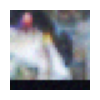

data range = [0.01568627543747425, 0.9921568632125854]


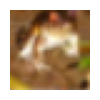

data range = [-2.2609200477600098, 2.537790060043335]


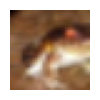

data range = [-2.1770617961883545, 2.6952004432678223]


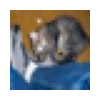

In [4]:
a, b = train_paired.__getitem__(0)
c, _ = down_train.__getitem__(0)
q, _ = down_test.__getitem__(0)
show(a)
show(b)
show(c)
show(q)